
# Lab 11: Understanding the data. 

Last 2 classes we have been working on understanding data. In this lab you will apply that.


**Context**
The goal of this lab is to understand a large dataset of 27901 rows and 18 columns Perform Exploratory Data Analysis (EDA) on the data. Look at how the data effects the end result **depression** (yes/no)
## Part 1
- Load and get a basic understanding of the dataset
- Clean up the data 
    - examples:
        - check and fix any missing data 
        - use both Hot and integer encoding
        - convert any numeric data from strings to ints
- Perform Exploratory Data Analysis (EDA) 
    - I will leave it to you to understand and explore this. 
        - Histplot
        - Countplot
        - Correlation
        - Heatmaps
        - boxplots
        - have fun

Make sure to communicate to me along the way. I want your to tell me what your assumptions are what your learning about the data and what you learned with EDA.  There are 18 data points for each student I expect an perform EDA on most of those points like what we did in class with MPG. 

##### ***Remember*** how we did a `sns.pairplot(df[[ "cylinders", "mpg","model_year"]])` and `sns.pairplot(df[["mpg", "horsepower", "weight", "displacement"]])` 


## Part 2: 
Model the data using what we learned in `Linear_Regression_Part2.ipynb` predict if a student will or will not have `Depression` 

- Perform linear Regression on the model using `DecisionTreeRegressor`
- Have at least 5 different models and how dropping a column effects the data predictor 
- Once you find a model with a good prediction play with the size of your test and training data to understand how it affects your model
    - compare the `R²` score  and the `MAE` to show improvement or degradation of the model.

**Remember to have fun with this**

----------------------------------------------------------------------------------------------------------------------------------------------

From: https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset/data


Field Descriptions

**id** - A unique identifier assigned to each student record in the dataset.

**Gender** - The gender of the student (e.g., Male, Female, Other). This helps in analyzing gender-specific trends in mental health.

**Age** - The age of the student in years.

**City** - The city or region where the student resides, providing geographical context for the analysis.

**Profession** - The field of work or study of the student, which may offer insights into occupational or academic stress factors.

**Academic Pressure** - A measure indicating the level of pressure the student faces in academic settings. This could include stress from exams, assignments, and overall academic expectations.

**Work Pressure** - A measure of the pressure related to work or job responsibilities, relevant for students who are employed alongside their studies.

**CGPA** - The cumulative grade point average of the student, reflecting overall academic performance.

**Study Satisfaction** - An indicator of how satisfied the student is with their studies, which can correlate with mental well-being.

**Job Satisfaction** - A measure of the student’s satisfaction with their job or work environment, if applicable.

**Sleep Duration** - The average number of hours the student sleeps per day, which is an important factor in mental health.

**Dietary Habits** - An assessment of the student’s eating patterns and nutritional habits, potentially impacting overall health and mood.

**Degree** - The academic degree or program that the student is pursuing.

**Have you ever had suicidal thoughts ?** - A binary indicator (Yes/No) that reflects whether the student has ever experienced suicidal ideation.

**Work/Study Hours** - The average number of hours per day the student dedicates to work or study, which can influence stress levels.

**Financial Stress** - A measure of the stress experienced due to financial concerns, which may affect mental health.

**Family History of Mental Illness** - Indicates whether there is a family history of mental illness (Yes/No), which can be a significant factor in mental health predispositions.

**Depression** - The target variable that indicates whether the student is experiencing depression (Yes/No).

------------------------------------------------------------------------------------------------------------------------------------------------

*Provided for reference only*
``` python 
import kagglehub
import shutil

# Download latest version
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

#move the dowload to the current directory
shutil.move(path, "./Lab_11_dataset")
````

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:/Users/Owner/Downloads/archive/student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [3]:
#last 5 rows
print(df.tail())

           id  Gender   Age       City Profession  Academic Pressure  \
27896  140685  Female  27.0      Surat    Student                5.0   
27897  140686    Male  27.0   Ludhiana    Student                2.0   
27898  140689    Male  31.0  Faridabad    Student                3.0   
27899  140690  Female  18.0   Ludhiana    Student                5.0   
27900  140699    Male  27.0      Patna    Student                4.0   

       Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
27896            0.0  5.75                 5.0               0.0   
27897            0.0  9.40                 3.0               0.0   
27898            0.0  6.61                 4.0               0.0   
27899            0.0  6.88                 2.0               0.0   
27900            0.0  9.24                 1.0               0.0   

            Sleep Duration Dietary Habits      Degree  \
27896          '5-6 hours'      Unhealthy  'Class 12'   
27897  'Less than 5 hours'        Healthy   

In [4]:
#Data Frame Info
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [5]:
#Descriptive statistics for numerical columns
print(df.describe())

                  id           Age  Academic Pressure  Work Pressure  \
count   27901.000000  27901.000000       27901.000000   27901.000000   
mean    70442.149421     25.822300           3.141214       0.000430   
std     40641.175216      4.905687           1.381465       0.043992   
min         2.000000     18.000000           0.000000       0.000000   
25%     35039.000000     21.000000           2.000000       0.000000   
50%     70684.000000     25.000000           3.000000       0.000000   
75%    105818.000000     30.000000           4.000000       0.000000   
max    140699.000000     59.000000           5.000000       5.000000   

               CGPA  Study Satisfaction  Job Satisfaction  Work/Study Hours  \
count  27901.000000        27901.000000      27901.000000      27901.000000   
mean       7.656104            2.943837          0.000681          7.156984   
std        1.470707            1.361148          0.044394          3.707642   
min        0.000000            0.00

In [6]:
#Descriptive statistics for categorical columns
print(df.describe(include='object'))

       Gender    City Profession       Sleep Duration Dietary Habits  \
count   27901   27901      27901                27901          27901   
unique      2      52         14                    5              4   
top      Male  Kalyan    Student  'Less than 5 hours'      Unhealthy   
freq    15547    1570      27870                 8310          10317   

            Degree Have you ever had suicidal thoughts ? Financial Stress  \
count        27901                                 27901            27901   
unique          28                                     2                6   
top     'Class 12'                                   Yes              5.0   
freq          6080                                 17656             6715   

       Family History of Mental Illness  
count                             27901  
unique                                2  
top                                  No  
freq                              14398  


In [7]:
#shape
print(f"Shape of the DataFrame (rows, columns): {df.shape}")


Shape of the DataFrame (rows, columns): (27901, 18)


In [8]:
#column names
print(f"Column names: {df.columns.tolist()}")


Column names: ['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']


In [9]:
#Data types of columns
print(df.dtypes)



id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
dtype: object


In [10]:
#Number of unique values per column
print(df.nunique())


id                                       27901
Gender                                       2
Age                                         34
City                                        52
Profession                                  14
Academic Pressure                            6
Work Pressure                                3
CGPA                                       332
Study Satisfaction                           6
Job Satisfaction                             5
Sleep Duration                               5
Dietary Habits                               4
Degree                                      28
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             6
Family History of Mental Illness             2
Depression                                   2
dtype: int64


In [11]:
#missing data
print(df.isnull().sum())


id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


I am exploring the dataset (df). My goal is to quickly grasp its fundamental characteristics by examining aspects like its initial data entries, the types of data in each column, any missing information, the overall dimensions of the dataset, and key summary statistics for both its numerical and categorical features.
so far the data was not missing so i was able to go down and understand each command with no problem. 

In [12]:
df = pd.get_dummies(df, columns=['Gender'], prefix='Gender', drop_first=True)
df = pd.get_dummies(df, columns=['City'], prefix='City', drop_first=True)
df = pd.get_dummies(df, columns=['Profession'], prefix='Profession', drop_first=True)
df = pd.get_dummies(df, columns=['Dietary Habits'], prefix='DietaryHabits', drop_first=True)
df = pd.get_dummies(df, columns=['Degree'], prefix='Degree', drop_first=True)
df = pd.get_dummies(df, columns=['Have you ever had suicidal thoughts ?'], prefix='SuicidalThoughts', drop_first=True)
df = pd.get_dummies(df, columns=['Financial Stress'], prefix='FinancialStress', drop_first=True) 
df = pd.get_dummies(df, columns=['Family History of Mental Illness'], prefix='FamilyHistory', drop_first=True)
print(df.head())

   id   Age  Academic Pressure  Work Pressure  CGPA  Study Satisfaction  \
0   2  33.0                5.0            0.0  8.97                 2.0   
1   8  24.0                2.0            0.0  5.90                 5.0   
2  26  31.0                3.0            0.0  7.03                 5.0   
3  30  28.0                3.0            0.0  5.59                 2.0   
4  32  25.0                4.0            0.0  8.13                 3.0   

   Job Satisfaction       Sleep Duration  Work/Study Hours  Depression  ...  \
0               0.0          '5-6 hours'               3.0           1  ...   
1               0.0          '5-6 hours'               3.0           0  ...   
2               0.0  'Less than 5 hours'               9.0           0  ...   
3               0.0          '7-8 hours'               4.0           1  ...   
4               0.0          '5-6 hours'               1.0           0  ...   

   Degree_MSc  Degree_Others  Degree_PhD  SuicidalThoughts_Yes  \
0       

im using the pd.get_dummies() function to convert the categorical columns 'Gender' in the DataFrame into new numerical binary columns. These new columns are added to the DataFrame alongside the original 'Gender' and 'Profession' columns.

In [13]:
if 'Sleep Duration' in df.columns:
    print("Applying Integer (Ordinal) Encoding to 'Sleep Duration'...")
    sleep_order_mapping = {
        "'Less than 5 hours'": 0,
        "'5-6 hours'": 1,
        "'7-8 hours'": 2, 
        "'More than 8 hours'": 3 
    }
    df['Sleep_Duration_Encoded'] = df['Sleep Duration'].map(sleep_order_mapping)
    print(df[['Sleep Duration', 'Sleep_Duration_Encoded']].head()) 
    df.drop('Sleep Duration', axis=1, inplace=True)
    print("\nDropped the original 'Sleep Duration' (object) column.")
else:
    print("'Sleep Duration' column not found for Integer Encoding.")

Applying Integer (Ordinal) Encoding to 'Sleep Duration'...
        Sleep Duration  Sleep_Duration_Encoded
0          '5-6 hours'                     1.0
1          '5-6 hours'                     1.0
2  'Less than 5 hours'                     0.0
3          '7-8 hours'                     2.0
4          '5-6 hours'                     1.0

Dropped the original 'Sleep Duration' (object) column.


this line of cod above show sthe to explicity convert the text (sleep Duration) inot maning ful numericl representatuons and creating a new colum for these numbers 

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

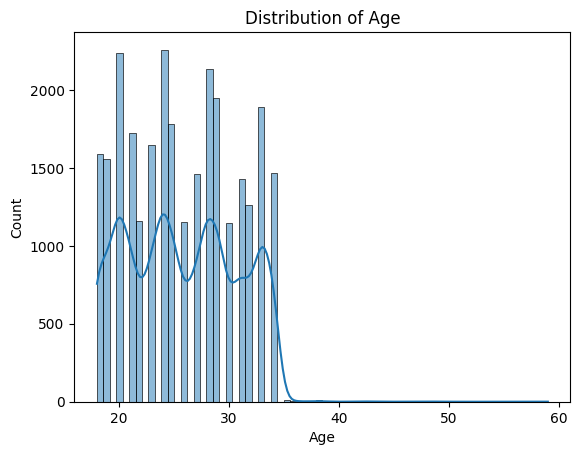

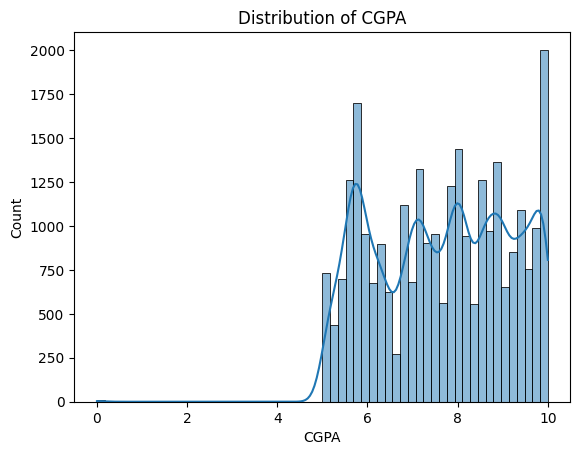

In [15]:
sns.histplot(data=df, x='Age', kde=True) 
plt.title('Distribution of Age')
plt.show()

sns.histplot(data=df, x='CGPA', kde=True)
plt.title('Distribution of CGPA')
plt.show()



About the Ages: Most people in your data are young, mainly in their 20s or early 30s. There are very few people older than about 35. Among the younger crowd, there isn't just one most common age; it looks like there are a few different common age spots.

About the Grades (CGPA): Most people have good grades (scores between 5.0 and 10.0). Hardly anyone has a grade below 5.0. The grades are spread out, and it seems there are a few different groups when it comes to how good their grades are. A surprising number of people have nearly perfect grades, right around the top score of 10.0.

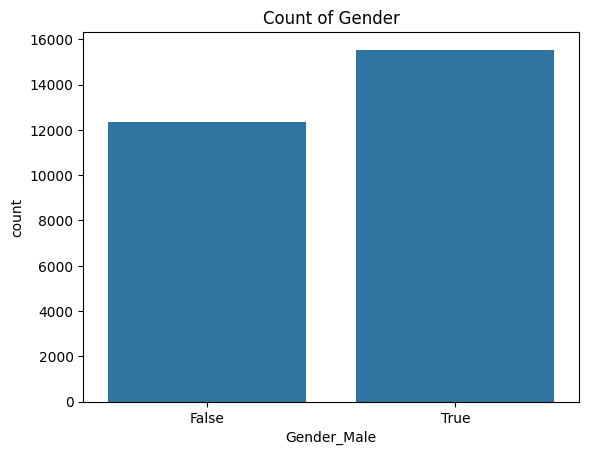

In [16]:
sns.countplot(data=df, x='Gender_Male') # Assuming Gender_Male from one-hot encoding
plt.title('Count of Gender')
plt.show()


How many males and females:
there is slight imblace bwtween genders has there happens to hae there i smore males then females 


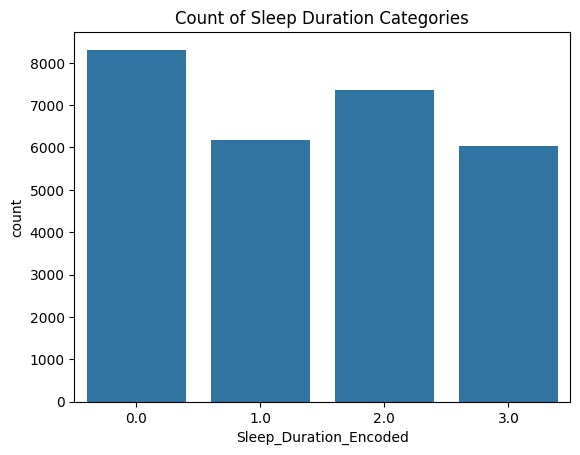

In [17]:
sns.countplot(data=df, x='Sleep_Duration_Encoded')
plt.title('Count of Sleep Duration Categories')
plt.show()


ths plot represent the how many sleep each group peeople have goten. for example  if 0 was 'Less than 5 hours' and 2 was '7-8 hours', this plot shows that more people reported 'Less than 5 hours' of sleep than '7-8 hours', but both are common.

In [18]:
numerical_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Work/Study Hours', 'Depression']

correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)

                        Age  Academic Pressure  Work Pressure      CGPA  \
Age                1.000000          -0.075803       0.002015  0.005056   
Academic Pressure -0.075803           1.000000      -0.022231 -0.022239   
Work Pressure      0.002015          -0.022231       1.000000 -0.050896   
CGPA               0.005056          -0.022239      -0.050896  1.000000   
Work/Study Hours  -0.032928           0.095970      -0.005468  0.002604   
Depression        -0.226422           0.474835      -0.003351  0.022210   

                   Work/Study Hours  Depression  
Age                       -0.032928   -0.226422  
Academic Pressure          0.095970    0.474835  
Work Pressure             -0.005468   -0.003351  
CGPA                       0.002604    0.022210  
Work/Study Hours           1.000000    0.208563  
Depression                 0.208563    1.000000  


the code calculates and displays a correlation matrix, which numerically shows how strongly different numerical variables in your dataset (like 'Age', 'Academic Pressure', 'CGPA', 'Depression') tend to have a linear relationship with each other, indicating if they typically increase or decrease together. for example  i notice that around 0.47 between 'Academic Pressure' and 'Depression', suggesting they tend to increase together.

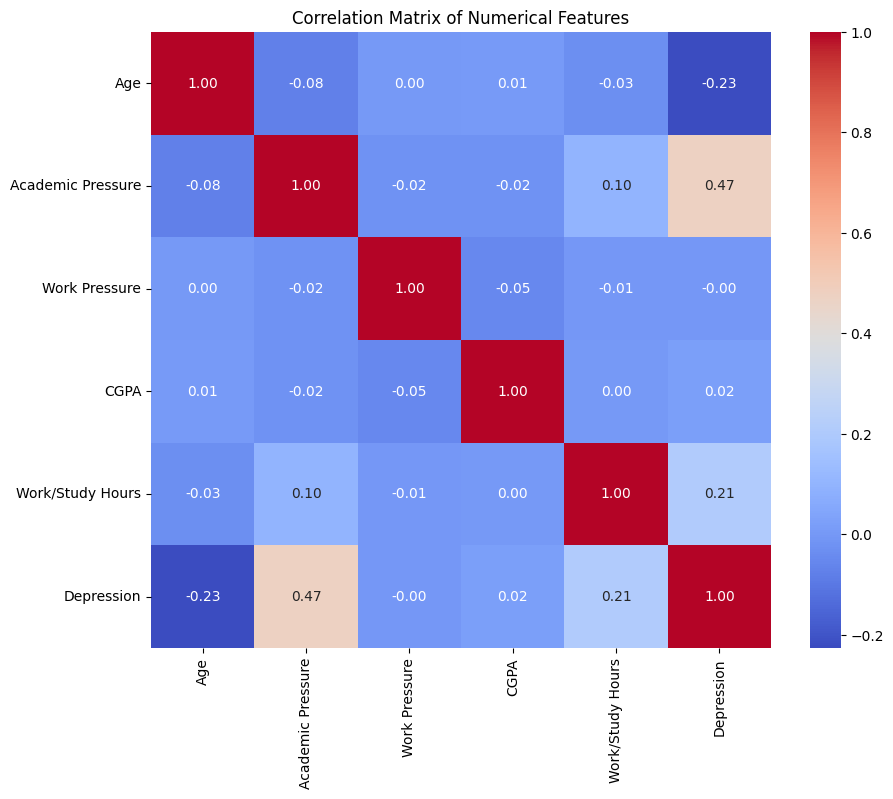

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

 the heatmap visually reinforces what you saw in the numerical correlation matrix, but often makes it easier and faster to identify the most important relationships by using color and intensity.

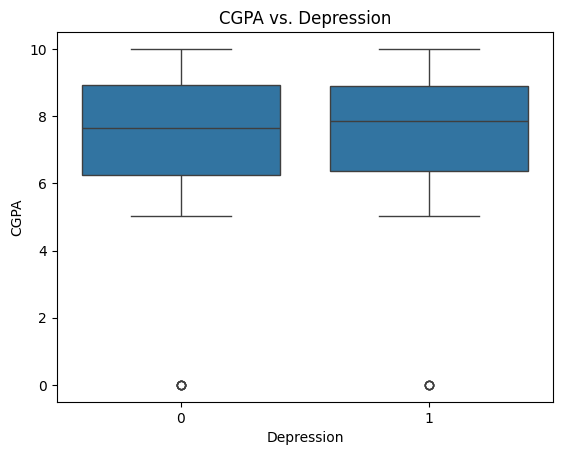

In [20]:
sns.boxplot(data=df, x='Depression', y='CGPA')
plt.title('CGPA vs. Depression')
plt.show()

These box plots visually compare the distribution (like typical values and spread) of numerical.

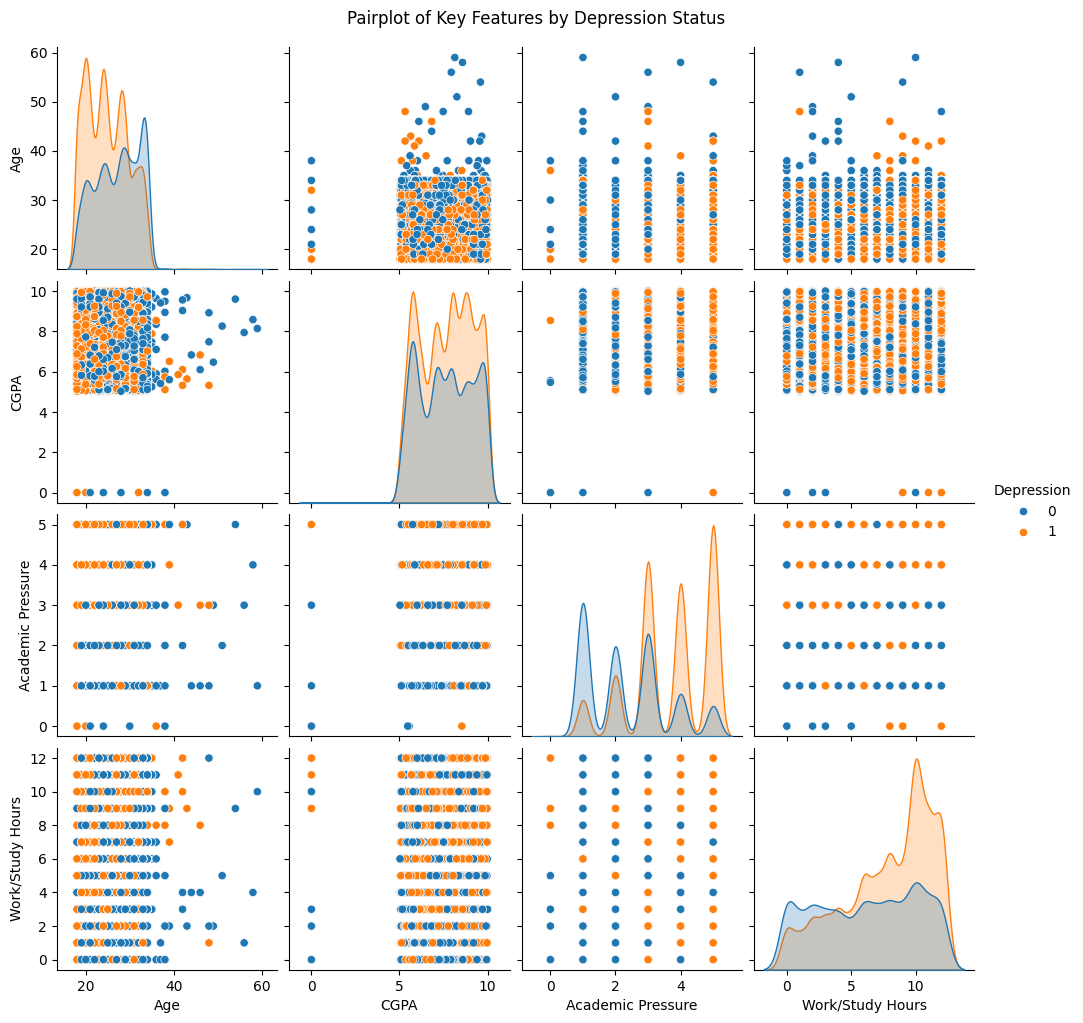

In [21]:
pairplot_cols = ['Age', 'CGPA', 'Academic Pressure', 'Work/Study Hours', 'Depression']
sns.pairplot(df[pairplot_cols], hue='Depression', diag_kind='kde') 
plt.suptitle('Pairplot of Key Features by Depression Status', y=1.02)
plt.show()


This pair plot visually explores how key features like Age, CGPA, Academic Pressure, and Work/Study Hours are distributed and related to each other, while color-coding the data to show differences based on Depression status.

In [ ]:
print("checking df info before defining features:;")
df.info()

Checking df info before defining features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Columns: 112 entries, id to Sleep_Duration_Encoded
dtypes: bool(102), float64(8), int64(2)
memory usage: 4.8 MB


In [24]:
target_column = 'Depression'
y = df[target_column]

print(f"\nTarget variable '{target_column}' selected.")
print("Shape of y (target):", y.shape)


Target variable 'Depression' selected.
Shape of y (target): (27901,)


In [25]:
print("\nDefining feature columns...")
feature_columns = [col for col in df.columns if col not in ['Depression', 'id']]


X = df[feature_columns]

print(f"Features selected: {X.columns.tolist()}")
print("Shape of X (features):", X.shape)


Defining feature columns...
Features selected: ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Gender_Male', "City_'Less than 5 Kalyan'", 'City_3.0', 'City_Agra', 'City_Ahmedabad', 'City_Bangalore', 'City_Bhavna', 'City_Bhopal', 'City_Chennai', 'City_City', 'City_Delhi', 'City_Faridabad', 'City_Gaurav', 'City_Ghaziabad', 'City_Harsh', 'City_Harsha', 'City_Hyderabad', 'City_Indore', 'City_Jaipur', 'City_Kalyan', 'City_Kanpur', 'City_Khaziabad', 'City_Kibara', 'City_Kolkata', 'City_Lucknow', 'City_Ludhiana', 'City_M.Com', 'City_M.Tech', 'City_ME', 'City_Meerut', 'City_Mihir', 'City_Mira', 'City_Mumbai', 'City_Nagpur', 'City_Nalini', 'City_Nalyan', 'City_Nandini', 'City_Nashik', 'City_Patna', 'City_Pune', 'City_Rajkot', 'City_Rashi', 'City_Reyansh', 'City_Saanvi', 'City_Srinagar', 'City_Surat', 'City_Thane', 'City_Vaanya', 'City_Vadodara', 'City_Varanasi', 'City_Vasai-Virar', 'City_Visakhapatnam', "Profession_'Content W

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


print("\n--- Training with DecisionTreeClassifier ---")
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_classifier = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_classifier)
precision = precision_score(y_test, y_pred_classifier, zero_division=0)
recall = recall_score(y_test, y_pred_classifier, zero_division=0)
f1 = f1_score(y_test, y_pred_classifier, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred_classifier)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)

r2_cls = r2_score(y_test, y_pred_classifier)
mae_cls = mean_absolute_error(y_test, y_pred_classifier)
print(f"\nR2 Score (treating 0/1 as continuous): {r2_cls:.4f}")
print(f"MAE (treating 0/1 as continuous): {mae_cls:.4f}")


print("\n--- Training with DecisionTreeRegressor ---")
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
y_pred_regressor_raw = dt_regressor.predict(X_test)

r2_reg = r2_score(y_test, y_pred_regressor_raw)
mae_reg = mean_absolute_error(y_test, y_pred_regressor_raw)
print(f"R2 Score: {r2_reg:.4f}")
print(f"MAE: {mae_reg:.4f}")


y_pred_regressor_classified = [1 if pred >= 0.5 else 0 for pred in y_pred_regressor_raw]
accuracy_reg_cls = accuracy_score(y_test, y_pred_regressor_classified)
print(f"\nAccuracy (after thresholding Regressor output): {accuracy_reg_cls:.4f}")


Shape of X_train: (22320, 110)
Shape of X_test: (5581, 110)
Shape of y_train: (22320,)
Shape of y_test: (5581,)

--- Training with DecisionTreeClassifier ---
Accuracy: 0.7646
Precision: 0.7993
Recall: 0.7934
F1-score: 0.7963
Confusion Matrix:
 [[1698  645]
 [ 669 2569]]

R2 Score (treating 0/1 as continuous): 0.0334
MAE (treating 0/1 as continuous): 0.2354

--- Training with DecisionTreeRegressor ---
R2 Score: 0.0128
MAE: 0.2405

Accuracy (after thresholding Regressor output): 0.7595


In [ ]:
model_results = []

model_results.append({
    'model_name': 'ALL Features (Classifier)',
    'accuracy' : accuracy,
    'precision' : precision,
    'recall': recall,
    'f1_score': f1,
    'r2_score_cls': r2_cls,
    'mae_cls': mae_cls
})
columns_to_try_dropping_sets =[
    ['Age'],                                 
    ['CGPA'],                                
    ['Sleep_Duration_Encoded'],
    ['Profession_Student'],
    ['Study Satisfaction']
]

for i, cols_to_drop in enumerate(columns_to_try_dropping_sets):
    if not all(col in X_train.columns for col in cols_to_drop):
        print(f"Skipping dropping {cols_to_drop} as one or more columns are not in X_train.")
        continue

    print(f"\n--- Training Model (Dropping: {', '.join(cols_to_drop)}) ---")
    
    
    X_train_modified = X_train.drop(columns=cols_to_drop, errors='ignore')
    X_test_modified = X_test.drop(columns=cols_to_drop, errors='ignore')
    
    if X_train_modified.shape[1] == 0: 
        print(f"Skipping model as dropping {cols_to_drop} left no features.")
        continue

    dt_classifier_dropped = DecisionTreeClassifier(random_state=42)
    dt_classifier_dropped.fit(X_train_modified, y_train)
    y_pred_dropped = dt_classifier_dropped.predict(X_test_modified)
    
    acc_dropped = accuracy_score(y_test, y_pred_dropped)
    prec_dropped = precision_score(y_test, y_pred_dropped, zero_division=0)
    rec_dropped = recall_score(y_test, y_pred_dropped, zero_division=0)
    f1_s_dropped = f1_score(y_test, y_pred_dropped, zero_division=0)
    r2_m_dropped = r2_score(y_test, y_pred_dropped) 
    mae_m_dropped = mean_absolute_error(y_test, y_pred_dropped)

    print(f"Accuracy: {acc_dropped:.4f}, F1-score: {f1_s_dropped:.4f}")
    print(f"R2 Score (cls): {r2_m_dropped:.4f}, MAE (cls): {mae_m_dropped:.4f}")
    
    model_results.append({
        'model_name': f'Dropped: {", ".join(cols_to_drop)} (Classifier)',
        'accuracy': acc_dropped,
        'precision': prec_dropped,
        'recall': rec_dropped,
        'f1_score': f1_s_dropped,
        'r2_score_cls': r2_m_dropped,
        'mae_cls': mae_m_dropped
    })


results_df_dropping_cols = pd.DataFrame(model_results)
print("\n--- Model Comparison (Effect of Dropping Columns) ---")
print(results_df_dropping_cols[['model_name', 'accuracy', 'f1_score', 'r2_score_cls', 'mae_cls']])


--- Training Model (Dropping: Age) ---
Accuracy: 0.7465, F1-score: 0.7811
R2 Score (cls): -0.0409, MAE (cls): 0.2535

--- Training Model (Dropping: CGPA) ---
Accuracy: 0.7699, F1-score: 0.8010
R2 Score (cls): 0.0554, MAE (cls): 0.2301

--- Training Model (Dropping: Sleep_Duration_Encoded) ---
Accuracy: 0.7604, F1-score: 0.7927
R2 Score (cls): 0.0165, MAE (cls): 0.2396

--- Training Model (Dropping: Profession_Student) ---
Accuracy: 0.7622, F1-score: 0.7950
R2 Score (cls): 0.0238, MAE (cls): 0.2378

--- Training Model (Dropping: Study Satisfaction) ---
Accuracy: 0.7633, F1-score: 0.7960
R2 Score (cls): 0.0282, MAE (cls): 0.2367

--- Model Comparison (Effect of Dropping Columns) ---
                                     model_name  accuracy  f1_score  \
0                                           NaN  0.764558  0.796342   
1                     Dropped: Age (Classifier)  0.746461  0.781129   
2                    Dropped: CGPA (Classifier)  0.769934  0.800992   
3  Dropped: Sleep_Duratio


--- Training with test_size = 0.1 ---
Test Size: 0.1 -> Accuracy: 0.7467, F1-score: 0.7869
                        -> R2 Score (cls): -0.0498, MAE (cls): 0.2533

--- Training with test_size = 0.2 ---
Test Size: 0.2 -> Accuracy: 0.7646, F1-score: 0.7963
                        -> R2 Score (cls): 0.0334, MAE (cls): 0.2354

--- Training with test_size = 0.3 ---
Test Size: 0.3 -> Accuracy: 0.7678, F1-score: 0.7993
                        -> R2 Score (cls): 0.0459, MAE (cls): 0.2322

--- Training with test_size = 0.4 ---
Test Size: 0.4 -> Accuracy: 0.7702, F1-score: 0.8027
                        -> R2 Score (cls): 0.0543, MAE (cls): 0.2298

--- Training with test_size = 0.5 ---
Test Size: 0.5 -> Accuracy: 0.7688, F1-score: 0.8024
                        -> R2 Score (cls): 0.0485, MAE (cls): 0.2312

--- Model Performance vs. Test/Train Split Size ---
   test_size  train_size  accuracy  f1_score  r2_score       mae
0        0.1         0.9  0.746686  0.786856 -0.049840  0.253314
1        0.

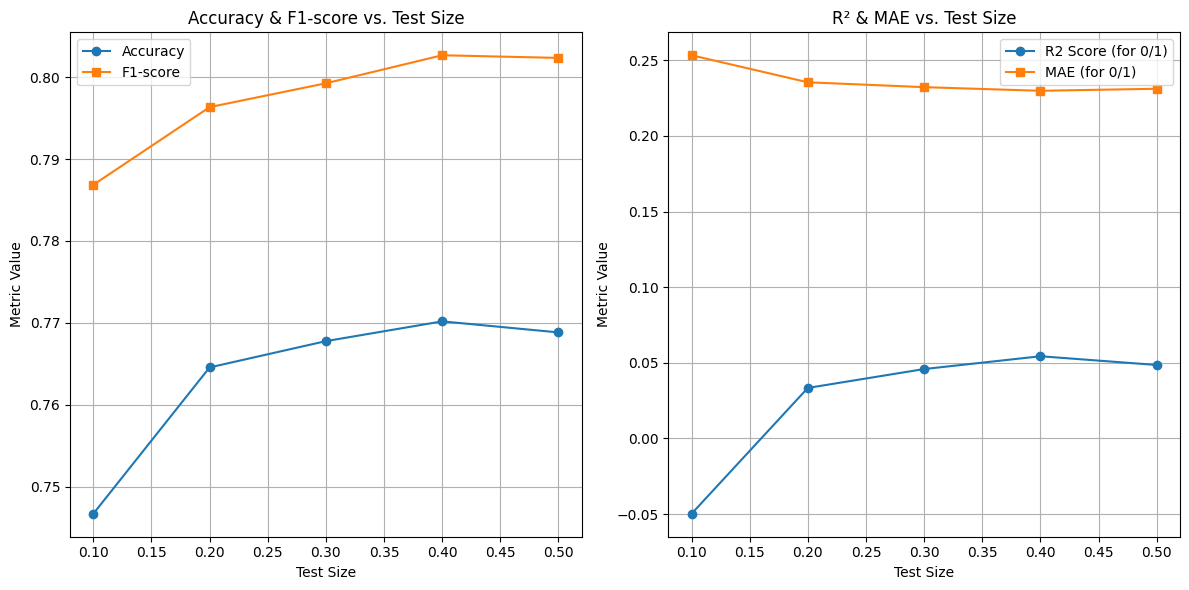

In [30]:


test_sizes_to_try = [0.1, 0.2, 0.3, 0.4, 0.5] 
test_size_experiment_results = []

X_for_split_exp = X.copy() 
y_for_split_exp = y.copy() 

for current_test_size in test_sizes_to_try:
    print(f"\n--- Training with test_size = {current_test_size} ---")
    
 
    X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(
        X_for_split_exp, y_for_split_exp, test_size=current_test_size, random_state=42
    )
    
    model_split_exp = DecisionTreeClassifier(random_state=42)
    model_split_exp.fit(X_train_exp, y_train_exp)
    y_pred_exp = model_split_exp.predict(X_test_exp)
    
    acc_exp = accuracy_score(y_test_exp, y_pred_exp)
    f1_s_exp = f1_score(y_test_exp, y_pred_exp, zero_division=0)
    r2_exp = r2_score(y_test_exp, y_pred_exp)
    mae_exp = mean_absolute_error(y_test_exp, y_pred_exp)

    print(f"Test Size: {current_test_size} -> Accuracy: {acc_exp:.4f}, F1-score: {f1_s_exp:.4f}")
    print(f"                        -> R2 Score (cls): {r2_exp:.4f}, MAE (cls): {mae_exp:.4f}")
        
    test_size_experiment_results.append({
        'test_size': current_test_size,
        'train_size': 1 - current_test_size, 
        'accuracy': acc_exp,
        'f1_score': f1_s_exp,
        'r2_score': r2_exp, 
        'mae': mae_exp       
    })

results_df_test_size = pd.DataFrame(test_size_experiment_results)
print("\n--- Model Performance vs. Test/Train Split Size ---")
print(results_df_test_size)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(results_df_test_size['test_size'], results_df_test_size['accuracy'], marker='o', label='Accuracy')
plt.plot(results_df_test_size['test_size'], results_df_test_size['f1_score'], marker='s', label='F1-score')
plt.xlabel('Test Size')
plt.ylabel('Metric Value')
plt.title('Accuracy & F1-score vs. Test Size')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(results_df_test_size['test_size'], results_df_test_size['r2_score'], marker='o', label='R2 Score (for 0/1)')
plt.plot(results_df_test_size['test_size'], results_df_test_size['mae'], marker='s', label='MAE (for 0/1)')
plt.xlabel('Test Size')
plt.ylabel('Metric Value')
plt.title('R² & MAE vs. Test Size')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()